# Python vs C++   

![raw](./imgs/lambo.jpg)

### code from previous notebooks

In [1]:
from PIL import Image
import ctypes
from ctypes import *
import numpy as np
import time

# http://localhost:8888/notebooks/1_Image_Metadata.ipynb
from AI_Decomposed import image_meta 
from AI_Decomposed import display_channel

# http://localhost:8888/notebooks/2_Py_Convolution.ipynb
from AI_Decomposed import PY_recurse_pooling

# http://localhost:8888/notebooks/3_CPP_Convolution.ipynb
from AI_Decomposed import native_recurse_pooling
CPP_recurse_convolution = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

## Let's compare the performance between C++ and Python

In [2]:
image_file = './imgs/lambo.jpg'
[height, width, red,green,blue] = image_meta(image_file)
channel_size = height * width

print('image height  : ', height)
print('image width   : ', width)
print('chanel size   : ', channel_size)
print('total pixels  : ', channel_size * 3) # 3 channels

image height  :  640
image width   :  1280
chanel size   :  819200
total pixels  :  2457600


### First C++

In [3]:
import time

recurse_cnt = 1

start = time.time()
# create reference to C++ fucntion
cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution
CPP_convolution = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)
print ('seconds: ',time.time() - start)

seconds:  0.410799503326416


### Second Python

In [4]:
start = time.time()
PY_convolution = PY_recurse_pooling(green, width, np.mean, recurse_cnt)
print ('seconds: ',time.time() - start)

seconds:  13.432726621627808


### verify results

In [5]:
recurse_cnt = 1
display(len(CPP_convolution))
display(len(PY_convolution))

817281

817281

### verify results visually

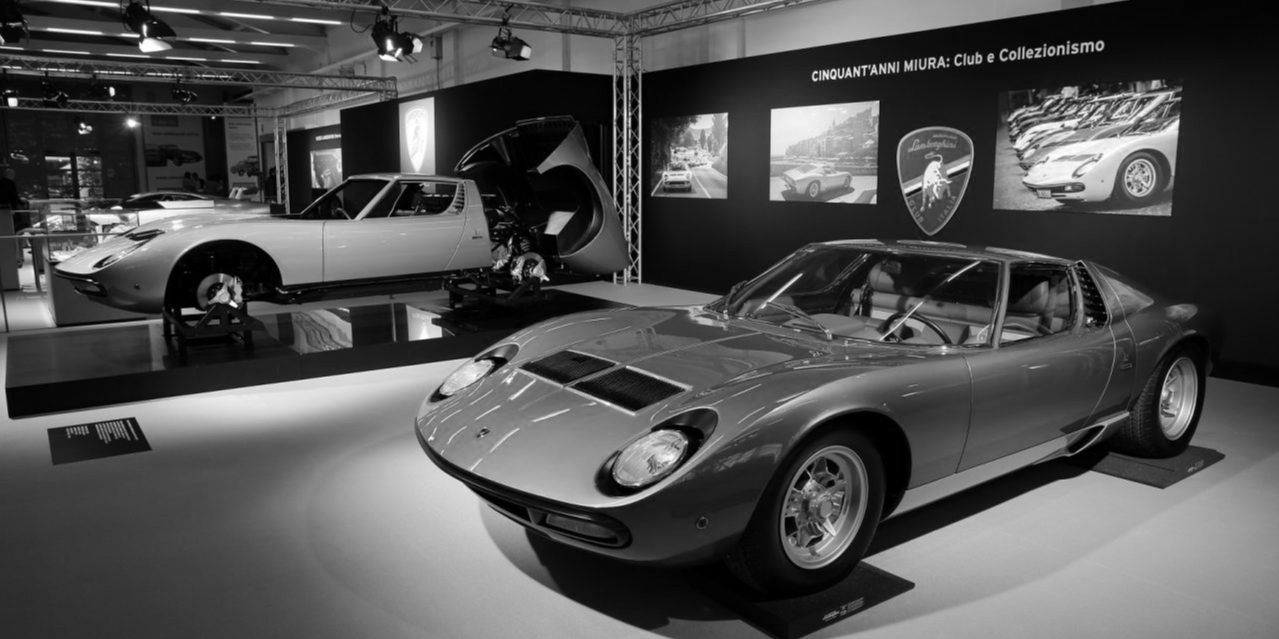

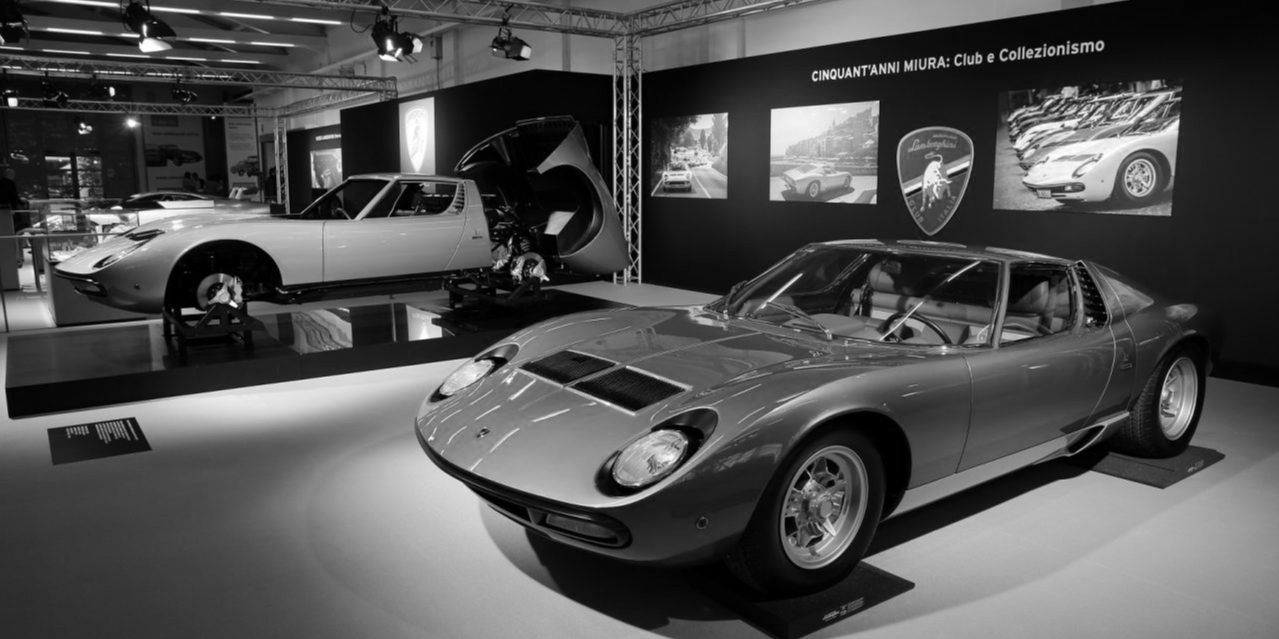

In [6]:
recurse_cnt = 1
display_channel(CPP_convolution, width - (recurse_cnt))
display_channel(PY_convolution, width - (recurse_cnt))

### let's test performance at different scales

In [7]:
def calc_ttl_pixels(width, height, recursions):    
    w = width
    h = height
    total_pixels = 0
    for i in range(1,(recursions+1),1):    
        total_pixels = total_pixels + (w*h)
        w = w - 1
        h = h - 1
    return total_pixels

In [8]:
py = list()
cpp = list()
pixels_processed = list()
recursions = [1, 2, 3] #, 15, 20, 25, 30, 35]

print('mat_size\t,\tpxls processed,\t\trecurse_cnt,\tcpp_time,\tpy_time')

cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

for recurse_cnt in recursions:
        
    print(len(green),  end='', flush=True)
    print('\t\t,\t',   end='', flush=True)
    
    ttl_pixels_calced = calc_ttl_pixels(width, height, recurse_cnt)
    pixels_processed.append(ttl_pixels_calced)
    print(ttl_pixels_calced,',\t\t',   end='', flush=True)
    
    
    print(recurse_cnt, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    cpp_conv = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)    
    secs = round(time.time() - start,2)
    cpp.append(ttl_pixels_calced/secs)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    py_conv = PY_recurse_pooling(green, width, np.mean, recurse_cnt)    
    secs = round(time.time() - start,2)
    py.append(ttl_pixels_calced/secs)
    print(secs, end='', flush=True)
        
    print()    
    

mat_size	,	pxls processed,		recurse_cnt,	cpp_time,	py_time
819200		,	819200 ,		1,		0.38,		13.37
819200		,	1636481 ,		2,		0.57,		26.4
819200		,	2451845 ,		3,		0.84,		39.9


# Visualize Performance

In [9]:
from bokeh.core.properties import value
from bokeh.io import show, output_notebook, reset_output
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

In [10]:
reset_output()
output_notebook()

Loading BokehJS ...

In [11]:
code_type = ['Python', 'C++']

In [22]:
recursions_str = list(map(lambda x: str(x) , recursions))
data = {'recursions' : recursions_str,
        'Python'   : py,
        'C++'      : cpp}

In [23]:
src = ColumnDataSource(data=data)

In [33]:
p = figure(x_range=recursions_str, y_range=(0, (max(py)*50)), plot_height=250, toolbar_location=None, tools="")

In [42]:
w=0.2

p.vbar(x=dodge('recursions',0.0 ,range=p.x_range),top='Python',width=w,source=src,color="#c9d9d3",legend=value("Python"))
p.vbar(x=dodge('recursions',0.25,range=p.x_range),top='C++',   width=w,source=src,color="#718dbf",legend=value("C++"))
# p.vbar(x=dodge('recursions',0.25,range=p.x_range),top='GPU',width=w,source=src,color="#e84d60",legend=value("GPU"))

p.x_range.range_padding = 0.001
p.xgrid.grid_line_color = None
p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

show(p)

# NEXT - easy "Pooling Convolution" with GPU

http://localhost:8888/notebooks/5_Calling_GPU_CUDA_code_from_Python.ipynb

![raw](./imgs/rari.jpg)